# Data Modeling

Now that we have gathered population and healtchare data for Benton County, let's use that data along with the smoke estimate I created in Part 1 and the AQI data I gathered in Part 1 to perform new analyses. These analyses will help me answer the question “How will wildfire smoke impact the number of hospitalizations for respiratory issues in Richland, WA in the coming years?”

In [22]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load the Data

We begin by loading all of the data

In [2]:
df_Benton_pop_est = pd.read_csv('../data/Benton_Population_Estimates.csv')
df_Benton_pop_est

,Year,Population Estimate
0,2010,176465.0
1,2011,180436.0
2,2012,182373.0
3,2013,184318.0
4,2014,186489.0
5,2015,190218.0
6,2016,193494.0
7,2017,198200.0
8,2018,201286.0
9,2019,204390.0


In [3]:
df_Benton_annual_discharges = pd.read_csv('../data/Annual_Discharges.csv')
df_Benton_annual_discharges

,Year,Total_Discharges
0,2012,895
1,2013,821
2,2014,891
3,2016,819
4,2017,935
5,2018,752
6,2019,843
7,2020,566


Load the wildfire data and my smoke estimtate I retrieved in Part 1.

In [4]:
df_aqi = pd.read_csv('../data/relevant_fires_and_smoke_est.csv')
df_aqi

/tmp/ipykernel_882/1918484056.py:1: DtypeWarning: Columns (13,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aqi = pd.read_csv('../data/relevant_fires_and_smoke_est.csv')


,OBJECTID,USGS_Assigned_ID,Assigned_Fire_Type,Fire_Year,Fire_Polygon_Tier,Fire_Attribute_Tiers,GIS_Acres,GIS_Hectares,Source_Datasets,Listed_Fire_Types,...,Prescribed_Burn_Notice,Wildfire_and_Rx_Flag,Overlap_Within_1_or_2_Flag,Circleness_Scale,Circle_Flag,Exclude_From_Summary_Rasters,Shape_Length,Shape_Area,distance_to_richland,my_smoke_estimate
0,14299,14299,Wildfire,1963,1,"1 (1), 3 (3)",40992.458271,16589.059302,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (1), Likely Wildfire (3)",...,Prescribed fire data in this dataset represent...,NaN,NaN,0.385355,NaN,No,73550.428118,1.658906e+08,189.757596,33.753967
1,14300,14300,Wildfire,1963,1,"1 (1), 3 (3)",25757.090203,10423.524591,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (2), Likely Wildfire (2)",...,Prescribed fire data in this dataset represent...,NaN,NaN,0.364815,NaN,No,59920.576713,1.042352e+08,163.213533,24.658160
2,14301,14301,Wildfire,1963,1,"1 (5), 3 (15), 5 (1)",45527.210986,18424.208617,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (6), Likely Wildfire (15)",...,Prescribed fire data in this dataset represent...,NaN,NaN,0.320927,NaN,No,84936.827810,1.842421e+08,190.823448,37.278578
3,14302,14302,Wildfire,1963,1,"1 (1), 3 (3), 5 (1)",10395.010334,4206.711433,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (2), Likely Wildfire (3)",...,Prescribed fire data in this dataset represent...,NaN,NaN,0.428936,NaN,No,35105.903602,4.206711e+07,273.615572,5.936140
4,14303,14303,Wildfire,1963,1,"1 (1), 3 (3)",9983.605738,4040.221900,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (1), Likely Wildfire (3)",...,Prescribed fire data in this dataset represent...,NaN,NaN,0.703178,NaN,No,26870.456126,4.040222e+07,205.770574,7.580960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76402,135057,135057,Prescribed Fire,2020,8,8 (3),16.412148,6.641761,Comb_National_Rx_Only_BLM_VTRT_Prescribed_Fire...,Prescribed Fire (3),...,Prescribed fire data in this dataset represent...,NaN,"Caution, this Prescribed Fire in 2020 overlaps...",0.177425,NaN,No,2168.900740,6.641761e+04,248.914999,NaN
76403,135058,135058,Prescribed Fire,2020,8,8 (1),7.050837,2.853373,Comb_National_Rx_Only_BLM_VTRT_Prescribed_Fire...,Prescribed Fire (1),...,Prescribed fire data in this dataset represent...,NaN,"Caution, this Prescribed Fire in 2020 overlaps...",0.374368,NaN,No,978.666221,2.853373e+04,167.983467,NaN
76404,135059,135059,Prescribed Fire,2020,8,8 (4),9.342668,3.780843,Comb_National_Rx_Only_BLM_VTRT_Prescribed_Fire...,Prescribed Fire (4),...,Prescribed fire data in this dataset represent...,NaN,"Caution, this Prescribed Fire in 2020 overlaps...",0.123888,NaN,No,1958.326660,3.780843e+04,168.822089,NaN
76405,135060,135060,Prescribed Fire,2020,8,8 (1),0.996962,0.403456,Comb_National_Rx_Only_BLM_VTRT_Prescribed_Fire...,Prescribed Fire (1),...,Prescribed fire data in this dataset represent...,NaN,NaN,0.993809,1.0,No,225.866452,4.034562e+03,655.423767,NaN


Load the AQI data

In [5]:
df_annual_aqi = pd.read_csv('../data/Annual_AQI_Average.csv')
df_annual_aqi

,Unnamed: 0,Year,AQI
0,0,1985,NaN
1,1,1986,NaN
2,2,1987,NaN
3,3,1988,NaN
4,4,1989,NaN
5,5,1990,NaN
6,6,1991,1258.000000
7,7,1992,303.500000
8,8,1993,1062.000000
9,9,1994,NaN


**Now, the remainder of this subsection, along with the "Correlation" and "Modeling" subsections below, heavily follow the techniques and methods I used in the Part 1 notebook I created for comparing and visualizing the data [1]. I will frequently copy or copy and modifiy relevant code snippets from that notebook, without providing further attribution or at a more granular level.**

## Correlation

Let's begin our investigation into the possible impacts of smoke on Richland by finding the correlation between the airquality due to smoke and the hospitalization rate. Because the healtchare data only has data points from 2012 - 2020 (excluding 2015), we will limit our examination to these years. Recall that my AQI data come from a sensor in Kennewick, WA - a city in Benton County and the healthcare data is for Benton County. Thus, although it is not ideal, we will assume that the patient discharge data and AQI for Benton County is representative of Richland, WA.

First, let's get the aqi data for 2012 - 2020 excluding 2015.

In [6]:
df_annual_relevant_aqi = df_annual_aqi[df_annual_aqi['Year'] > 2011]
df_annual_relevant_aqi = df_annual_relevant_aqi[df_annual_relevant_aqi['Year'] < 2021]
df_annual_relevant_aqi = df_annual_relevant_aqi.reset_index(drop=True)

# remove the entry for 2015
df_annual_relevant_aqi = df_annual_relevant_aqi.drop(index=3).reset_index(drop=True)

# drop useless column
df_annual_relevant_aqi = df_annual_relevant_aqi.drop(columns=['Unnamed: 0'], axis=1)

df_annual_relevant_aqi

,Year,AQI
0,2012,27.417582
1,2013,27.673130
2,2014,23.468391
3,2016,23.546448
4,2017,31.753425
5,2018,28.747945
6,2019,27.258242
7,2020,34.630137


Let's look at the change in patient discharges

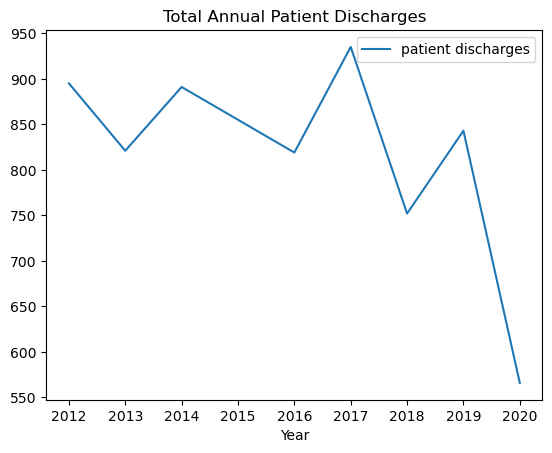

In [7]:
# -------------------------- referenced In [9] from part 1 ------------------------#
# plot a time series of annual discharges

# healthcare
x1 = df_Benton_annual_discharges['Year']
y1 = df_Benton_annual_discharges['Total_Discharges']
plt.plot(x1, y1, label = 'patient discharges')

# add a legend
plt.legend()

plt.xlabel('Year')
plt.title('Total Annual Patient Discharges')

# plot
plt.show()

Also, because population fluctuates, we need to control for that when looking at how the annual patient discharges for selected respiratory issues changes over time. Before we do that, however, we need to grab 2012 - 2020 (again excluding 2015) from the population estimate data to align with the healthcare data.

In [8]:
# filter to the relevant years
df_Benton_pop_est = df_Benton_pop_est[df_Benton_pop_est['Year'] > 2011]
df_Benton_pop_est = df_Benton_pop_est[df_Benton_pop_est['Year'] < 2021]
df_Benton_pop_est = df_Benton_pop_est.reset_index(drop=True)

df_Benton_pop_est = df_Benton_pop_est.drop(index=3)
df_Benton_pop_est = df_Benton_pop_est.reset_index(drop=True)
df_Benton_pop_est

,Year,Population Estimate
0,2012,182373.0
1,2013,184318.0
2,2014,186489.0
3,2016,193494.0
4,2017,198200.0
5,2018,201286.0
6,2019,204390.0
7,2020,207413.0


Now, let's divide the number of discharges each year by the population estimate of Benton County that year to control for population variation and then plot the ratio.

In [9]:
# calculate ratio
df_discharge_ratio = pd.DataFrame()
df_discharge_ratio['Year'] = df_Benton_pop_est['Year']
df_discharge_ratio['Discharge Ratio'] = df_Benton_annual_discharges['Total_Discharges'] / df_Benton_pop_est['Population Estimate']
df_discharge_ratio

,Year,Discharge Ratio
0,2012,0.004908
1,2013,0.004454
2,2014,0.004778
3,2016,0.004233
4,2017,0.004717
5,2018,0.003736
6,2019,0.004124
7,2020,0.002729


Let's convert the discharge ratio from discharges per person in Benton to discharges per 1,000 people

In [10]:
df_discharge_ratio['Discharge Ratio'] = df_discharge_ratio['Discharge Ratio'] * 1000
df_discharge_ratio

,Year,Discharge Ratio
0,2012,4.907525
1,2013,4.454258
2,2014,4.777762
3,2016,4.232689
4,2017,4.717457
5,2018,3.735978
6,2019,4.124468
7,2020,2.728855


Again, let's plot the results

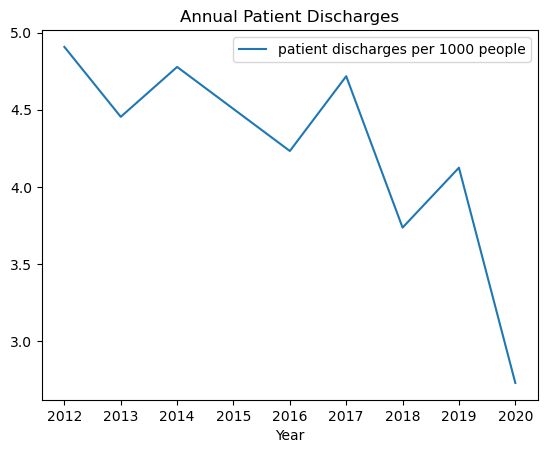

In [11]:
# -------------------------- referenced In [9] from part 1 ------------------------#
# plot a time series of annual discharges per 1000 people
x = df_discharge_ratio['Year']
y = df_discharge_ratio['Discharge Ratio']
plt.plot(x, y, label = 'patient discharges per 1000 people')

# add a legend
plt.legend()

plt.xlabel('Year')
plt.title('Annual Patient Discharges')

# plot
plt.show()

Looking at the plot above, the trend appears to be simillar to the patient discharge plot earlier where we did not control for population. It is interesting the number of discharges drops in 2020. I would have expected the number to increase significantly due to Covid-19 being a respiratory disease. Still, let's remove it from consideration as it still may be an outlier due to Covid-19.

In [12]:
df_discharge_ratio = df_discharge_ratio[df_discharge_ratio['Year'] != 2020]
df_discharge_ratio = df_discharge_ratio.reset_index(drop=True)
df_discharge_ratio

,Year,Discharge Ratio
0,2012,4.907525
1,2013,4.454258
2,2014,4.777762
3,2016,4.232689
4,2017,4.717457
5,2018,3.735978
6,2019,4.124468


Now, let's observe the AQI trends - but first let's remove 2020 from consideration here as well, to align with the discharge data

In [14]:
df_annual_relevant_aqi

,Year,AQI
0,2012,27.417582
1,2013,27.673130
2,2014,23.468391
3,2016,23.546448
4,2017,31.753425
5,2018,28.747945
6,2019,27.258242
7,2020,34.630137


In [16]:
df_annual_relevant_aqi = df_annual_relevant_aqi[df_annual_relevant_aqi['Year'] != 2020]
df_annual_relevant_aqi = df_annual_relevant_aqi.reset_index(drop=True)
df_annual_relevant_aqi

,Year,AQI
0,2012,27.417582
1,2013,27.673130
2,2014,23.468391
3,2016,23.546448
4,2017,31.753425
5,2018,28.747945
6,2019,27.258242


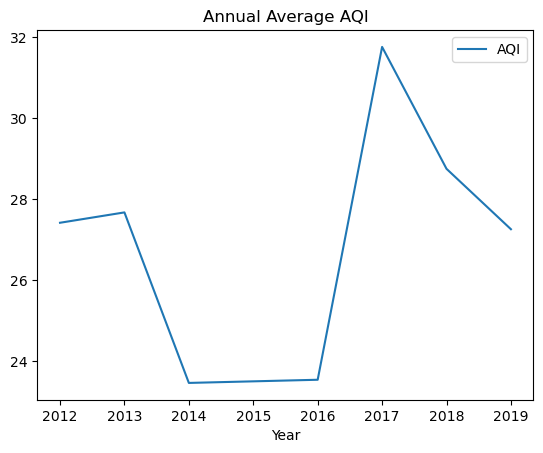

In [17]:
# -------------------------- referenced In [9] from part 1 ------------------------#
# plot a time series of annual discharges

# aqi
x = df_annual_relevant_aqi['Year']
y = df_annual_relevant_aqi['AQI']
plt.plot(x, y, label = 'AQI')

# add a legend
plt.legend()

plt.xlabel('Year')
plt.title('Annual Average AQI')

# plot
plt.show()

Now, let's look at the correlation between the AQI data and annual total patient discharges for Benton County. We begin by constructing a scatter plot. I referenced [2]. to learn that a scatter plot is a useful way to visualize correlation - as well as supplemented my knowledge of how to create one.

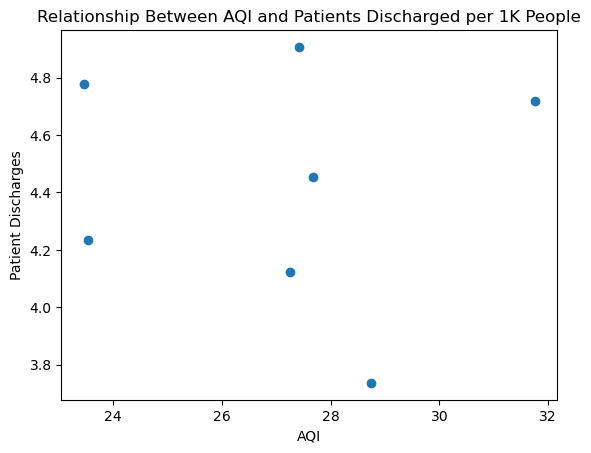

In [18]:
# -------------------------- referenced In [8] from part 1 ------------------------#
# create a scatter plot
# I referenced https://www.w3schools.com/python/matplotlib_scatter.asp for how to create
# a scatte plot
x = df_annual_relevant_aqi['AQI']
y = df_discharge_ratio['Discharge Ratio']
plt.scatter(x, y)

plt.xlabel('AQI')
plt.ylabel('Patient Discharges')
plt.title('Relationship Between AQI and Patients Discharged per 1K People')
plt.show()

The data is relatively sparse and there is no obvious correlation. Let's caculate the correlation numerically to confirm this.

In [19]:
# -------------------------- referenced In [10] from part 1 ------------------------#
# calculate the correlation
# I learned how to do this from: https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html
x.corr(y)

-0.03424878673767594

This result basically confimrs what we interpreted from the graph. There is a very slight negative correlation - essentially no correlation between the AQI and number of patients discharged per 1000 people. These findings surprise me, as I expected to see a positive correlation between AQI and the number of patient discharges.

## Modeling

Because we determined that there is virtually no corellation between AQI and patient discharges, above, I do not think it makes sense to attempt to predict the future number of discharges based on AQI. However, I stated in my project extension plan that I would use a simple model to attempt this, so I will proceed.

Note: in my extension proposal, I included a potential timeline and breakdown of the tasks I would perform. There I indicated that I would conduct a brief survey of various models used in current literature. However, due to **_____** I will skip that step and proceed with using a simple linear regression model as I did in Part 1 of the project.

**Don't believe Valuable**

Now, let's predict the hospitalization rate for Richland for the following 25 years (i.e. from 2020 - 2045).

In [30]:
# ------------------------ based off of cell In [6] from [1] ----------------------- #
from sklearn.linear_model import LinearRegression

# get training data
X_train = np.array(df_annual_relevant_aqi)
Y_train = df_discharge_ratio['Discharge Ratio']

# train the model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# get predictions
years = list(range(2020, 2045 + 1))



# Y_preds = linear_model.predict(X_preds)
# Y_preds


(26,)

## Findings and Discussion

## Limitations and Assumptions

Limitations:
- small sample size. Comparing the relationship between < 10 datapoints for discharges and AQI.

Lessons Learned/Common Operations to Memorize:

## References
- [1]. Project Part 1 - Common Analysis-s3-Comparison-and-Visualization
- [2]. https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf